# 图像特效-BigBrother滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/f4.jpg')
gray = cv2.imread('../datas/f4.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [60]:
def draw_tone(ax,ay,src,dst,arr_dither,dotarea):
    rows,cols = src.shape[0],src.shape[1]
    for i in range(dotarea * dotarea):
        lx = i % dotarea
        ly = i // dotarea
        if ax + lx < cols and ay + ly < rows:
            gray_intensity = int(255 - src[ay+ly,ax+lx])
            if gray_intensity > arr_dither[i]:
                dst[ay+ly,ax+lx] = 0
            else:
                dst[ay+ly,ax+lx] = 255
def bigbrother_filter(src):
    rows,cols = src.shape[0],src.shape[1]
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB)
    dst = np.zeros_like(srcf)
    dotarea = 10
    arr_dither = np.array([
        167,200,230,216,181,
            94,72,193,242,232,
            36,52,222,167,200,
            181,126,210,94,72,
            232,153,111,36,52,
            167,200,230,216,181,
            94,72,193,242,232,
            36,52,222,167,200,
            181,126,210,94,72,
            232,153,111,36,52,
            167,200,230,216,181,
            94,72,193,242,232,
            36,52,222,167,200,
            181,126,210,94,72,
            232,153,111,36,52,
            167,200,230,216,181,
            94,72,193,242,232,
            36,52,222,167,200,
            181,126,210,94,72,
            232,153,111,36,52
    ])
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dr,dg,db = dst[:,:,0],dst[:,:,1],dst[:,:,2]
    for i in range(0,rows,dotarea):
        for j in range(0,cols,dotarea):
            draw_tone(j,i,r,dr,arr_dither,dotarea)
            draw_tone(j,i,g,dg,arr_dither,dotarea)
            draw_tone(j,i,b,db,arr_dither,dotarea)
    dst[:,:,0] = dr
    dst[:,:,1] = dg
    dst[:,:,2] = db
    return np.uint8(dst)

In [61]:
dst = bigbrother_filter(rgb)

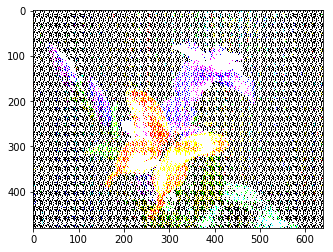

In [62]:
plt.imshow(dst)